In [1]:
#import packages
import pandas as pd
import numpy as np

import math

#import combined dataset

#data = pd.read_csv('/Users/Kevin/Downloads/Capstone.csv')

# assume value for rating is pecentage of total spent on product 
#data['Rating'] = (data['UNITE_PRICE_$']/ data['TOTAL_SPENT']) * 100 

#data 



In [2]:
#ratings1 = ratings.drop_duplicates(subset=['EndUserID', 'ProductID'])
ratings1 = pd.read_csv('s3://kevinr/ratings1.csv')
ratings1

EndUserID  ProductID  Rating
0               1          1     1.0
1               1          2     1.0
2               1          3     1.0
3               1          4     1.0
4               1          5     1.0
...           ...        ...     ...
609518     148459      14444   100.0
609519     148460      14444   100.0
609520     148461      14444   100.0
609521     148462      14444   100.0
609522     148463      14444   100.0

[609523 rows x 3 columns]

In [3]:
rat1 = ratings1[:304750]
rat1

EndUserID  ProductID  Rating
0               1          1     1.0
1               1          2     1.0
2               1          3     1.0
3               1          4     1.0
4               1          5     1.0
...           ...        ...     ...
304745      17677      12950    12.0
304746      17677       5680    12.0
304747      17677       6456    39.0
304748      17677       6968    14.0
304749      17677       7004    26.0

[304750 rows x 3 columns]

In [4]:
rat2 = ratings1[304750:457146]
rat2

EndUserID  ProductID  Rating
304750      17678       5640     1.0
304751      17678        465     5.0
304752      17678        818     1.0
304753      17678        890     1.0
304754      17678       9781     5.0
...           ...        ...     ...
457141      56412       7320     2.0
457142      56412      10969     2.0
457143      56412       7333     2.0
457144      56412       4914    25.0
457145      56412       3141    22.0

[152396 rows x 3 columns]

In [5]:
rat3 = ratings1[457146: ]
rat3

EndUserID  ProductID  Rating
457146      56413       1017    18.0
457147      56413       2563    81.0
457148      56413       3141     3.0
457149      56414       1017    15.0
457150      56415       1017    24.0
...           ...        ...     ...
609518     148459      14444   100.0
609519     148460      14444   100.0
609520     148461      14444   100.0
609521     148462      14444   100.0
609522     148463      14444   100.0

[152377 rows x 3 columns]

In [6]:
R_df = rat1.pivot(index = 'EndUserID', columns ='ProductID', values = 'Rating').fillna(0)
R_df.head()

ProductID  1      2      3      4      5      6      7      8      9      \
EndUserID                                                                  
1            1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2            1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3            1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4            1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5            2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ProductID  10     ...  27861  27862  27863  27864  27865  27866  27867  27868  \
EndUserID         ...                                                           
1            1.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ProductID  27869  27870  
EndUserID                
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0  
5            0.0    0.0  

[5 rows x 27870 columns]

In [7]:
R_df2 = rat2.pivot(index = 'EndUserID', columns ='ProductID', values = 'Rating').fillna(0)
R_df2.head()

ProductID  196    198    199    200    201    202    203    204    205    \
EndUserID                                                                  
17678        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17679        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17680        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17681        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17682        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ProductID  206    ...  30673  30674  30675  30676  30677  30678  30679  30680  \
EndUserID         ...                                                           
17678        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17679        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17680        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17681        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17682        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ProductID  30681  30682  
EndUserID                
17678        0.0    0.0  
17679        0.0    0.0  
17680        0.0    0.0  
17681        0.0    0.0  
17682        0.0    0.0  

[5 rows x 16283 columns]

In [8]:
R_df3 = rat3.pivot(index = 'EndUserID', columns ='ProductID', values = 'Rating').fillna(0)
R_df3.head()

ProductID  1017   1018   1019   1020   1021   1022   1023   1024   1025   \
EndUserID                                                                  
56413       18.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56414       15.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56415       24.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56416        6.0    0.0    0.0    0.0    7.0    0.0    0.0    0.0    0.0   
56417       64.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ProductID  1026   ...  31915  31916  31917  31918  31919  31920  31921  31922  \
EndUserID         ...                                                           
56413        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56414        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56415        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56416        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56417        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ProductID  31923  31924  
EndUserID                
56413        0.0    0.0  
56414        0.0    0.0  
56415        0.0    0.0  
56416        0.0    0.0  
56417        0.0    0.0  

[5 rows x 11082 columns]

In [9]:
dz  = pd.concat([R_df, R_df2]).fillna(0)
dz

ProductID  1      2      3      4      5      6      7      8      9      \
EndUserID                                                                  
1            1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2            1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3            1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4            1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5            2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
56408        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56409        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56410        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56411        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56412        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ProductID  10     ...  30673  30674  30675  30676  30677  30678  30679  30680  \
EndUserID         ...                                                           
1            1.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...          ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
56408        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56409        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56410        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56411        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
56412        0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ProductID  30681  30682  
EndUserID                
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0  
5            0.0    0.0  
...          ...    ...  
56408        0.0    0.0  
56409        0.0    0.0  
56410        0.0    0.0  
56411        0.0    0.0  
56412        0.0    0.0  

[56412 rows x 30682 columns]

In [10]:
dr  = pd.concat([dz, R_df3]).fillna(0)
dr

ProductID  1      2      3      4      5      6      7      8      9      \
EndUserID                                                                  
1            1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2            1.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3            1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4            1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5            2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
148459       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
148460       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
148461       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
148462       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
148463       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ProductID  10     ...  31915  31916  31917  31918  31919  31920  31921  31922  \
EndUserID         ...                                                           
1            1.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5            0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...          ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
148459       0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
148460       0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
148461       0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
148462       0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
148463       0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ProductID  31923  31924  
EndUserID                
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0  
5            0.0    0.0  
...          ...    ...  
148459       0.0    0.0  
148460       0.0    0.0  
148461       0.0    0.0  
148462       0.0    0.0  
148463       0.0    0.0  

[148463 rows x 31924 columns]

In [12]:
print('we have',ratings1.shape[0], 'ratings')
print('the number of unique users we have is:', len(ratings1.EndUserID.unique()))
print('the number of unique products we have is:', len(ratings1.ProductID.unique()))
print("The avg user purchaseed %d products."%ratings1.EndUserID.value_counts().mean())
print('The max rating is: %d'%ratings1.Rating.max(),"the min rating is: %d"%ratings1.Rating.min())

we have 609523 ratings
the number of unique users we have is: 148463
the number of unique products we have is: 31924
The avg user purchaseed 4 products.
The max rating is: 100 the min rating is: 1


In [13]:
#run model
R = dr.values
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [14]:
R_demeaned

array([[ 0.89475003,  0.89475003,  0.89475003, ..., -0.10524997,
        -0.10524997, -0.10524997],
       [ 0.92482145, -0.07517855, -0.07517855, ..., -0.07517855,
        -0.07517855, -0.07517855],
       [ 0.97788498, -0.02211502, -0.02211502, ..., -0.02211502,
        -0.02211502, -0.02211502],
       ...,
       [-0.00313244, -0.00313244, -0.00313244, ..., -0.00313244,
        -0.00313244, -0.00313244],
       [-0.00313244, -0.00313244, -0.00313244, ..., -0.00313244,
        -0.00313244, -0.00313244],
       [-0.00313244, -0.00313244, -0.00313244, ..., -0.00313244,
        -0.00313244, -0.00313244]])

In [15]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 500)
print("done")

done


In [16]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = dr.columns)
print("done")

done


In [17]:
preds_df

ProductID     1         2         3         4         5         6      \
0          0.096562  0.096770  0.099122  0.100713  0.103416  0.100811   
1          0.065950  0.066122  0.068427  0.068871  0.073715  0.070622   
2          0.017543  0.017557  0.019221  0.018517  0.022695  0.019813   
3          0.004065  0.003866  0.004179  0.004184  0.004454  0.004769   
4          0.007093  0.000094  0.000391  0.000411  0.012654  0.000164   
...             ...       ...       ...       ...       ...       ...   
148458     0.003177  0.003174  0.003185  0.003151  0.003153  0.003169   
148459     0.003177  0.003174  0.003185  0.003151  0.003153  0.003169   
148460     0.003177  0.003174  0.003185  0.003151  0.003153  0.003169   
148461     0.003177  0.003174  0.003185  0.003151  0.003153  0.003169   
148462     0.003177  0.003174  0.003185  0.003151  0.003153  0.003169   

ProductID     7         8         9         10     ...     31915     31916  \
0          0.097368  0.096261  0.111475  0.096886  ...  0.095510  0.095510   
1          0.066642  0.065534  0.176410  0.066644  ...  0.064861  0.064861   
2          0.017750  0.017147  0.110801  0.017943  ...  0.016848  0.016848   
3          0.003925  0.003836  0.006936  0.003836  ...  0.003773  0.003773   
4          0.000044  0.000054  0.006500  0.000005  ...  0.000010  0.000010   
...             ...       ...       ...       ...  ...       ...       ...   
148458     0.003173  0.003176  0.001943  0.003170  ...  0.003177  0.003177   
148459     0.003173  0.003176  0.001943  0.003170  ...  0.003177  0.003177   
148460     0.003173  0.003176  0.001943  0.003170  ...  0.003177  0.003177   
148461     0.003173  0.003176  0.001943  0.003170  ...  0.003177  0.003177   
148462     0.003173  0.003176  0.001943  0.003170  ...  0.003177  0.003177   

ProductID     31917     31918     31919     31920     31921     31922  \
0          0.095510  0.095510  0.095510  0.095510  0.095510  0.095510   
1          0.064861  0.064861  0.064861  0.064861  0.064861  0.064861   
2          0.016848  0.016848  0.016848  0.016848  0.016848  0.016848   
3          0.003773  0.003773  0.003773  0.003773  0.003773  0.003773   
4          0.000010  0.000010  0.000010  0.000010  0.000010  0.000010   
...             ...       ...       ...       ...       ...       ...   
148458     0.003177  0.003177  0.003177  0.003177  0.003177  0.003177   
148459     0.003177  0.003177  0.003177  0.003177  0.003177  0.003177   
148460     0.003177  0.003177  0.003177  0.003177  0.003177  0.003177   
148461     0.003177  0.003177  0.003177  0.003177  0.003177  0.003177   
148462     0.003177  0.003177  0.003177  0.003177  0.003177  0.003177   

ProductID     31923     31924  
0          0.095510  0.095510  
1          0.064861  0.064861  
2          0.016848  0.016848  
3          0.003773  0.003773  
4          0.000010  0.000010  
...             ...       ...  
148458     0.003177  0.003177  
148459     0.003177  0.003177  
148460     0.003177  0.003177  
148461     0.003177  0.003177  
148462     0.003177  0.003177  

[148463 rows x 31924 columns]

In [18]:
def reccomendtop5(userID):
    user_row_number = userID - 1 # UserID starts at 1, not 0 in matrix
    su = preds_df.iloc[user_row_number].sort_values(ascending=False)
    s = pd.DataFrame({'ProductID':su.index, 'Est_Rating':su.values})
    
    #get products already bout by user
    productsPerUser = ratings1.groupby('EndUserID')['ProductID'].apply(list)
    PPU = pd.DataFrame({'User':productsPerUser.index, 'Products':productsPerUser.values})
    PPU =  PPU[PPU.User == userID].iloc[0]
    bought = PPU.Products
    
    # remove products already bought
    s = s[~s['ProductID'].isin(bought)]
    
    #reccomend top 5 highest rated in remaining 
    x=print( s.head(5))
    y = print(bought)
    return



In [19]:
# test reccomendation function
reccomendtop5(7)

   ProductID  Est_Rating
1       1671    1.364723
2      14379    0.516507
3       1663    0.506657
4       3327    0.496527
5       2683    0.375458
[1, 6, 3363, 868, 4992]


In [20]:
def getAccuracy(userID):
    user_row_number = userID - 1 # UserID starts at 1, not 0 in matrix
    su = preds_df.iloc[user_row_number].sort_values(ascending=False).iloc[:5]
    s = pd.DataFrame({'ProductID':su.index, 'Est_Rating':su.values})
    
    predictions = s
    
    productsPerUser = ratings1.groupby('EndUserID')['ProductID'].apply(list)
    PPU = pd.DataFrame({'User':productsPerUser.index, 'Products':productsPerUser.values})
    PPU =  PPU[PPU.User == userID].iloc[0]
    count = 0
    for i in predictions.ProductID:
        if i in(PPU.Products):
            count +=1
    accuracy = count
    print("t")
    return accuracy

In [21]:
## evaluate accuracy of model

import random
random.seed(123)
input2 = random.sample(range(1, 148464), 300)




In [22]:

input2

[13727,
 70170,
 22856,
 106756,
 69876,
 28233,
 10002,
 99386,
 140563,
 147409,
 87084,
 89339,
 13606,
 41855,
 35405,
 88400,
 147053,
 87503,
 64269,
 42934,
 438,
 114368,
 22968,
 98985,
 18318,
 1729,
 82696,
 117525,
 26749,
 11505,
 24318,
 37271,
 33096,
 5567,
 76495,
 112890,
 125023,
 69553,
 123023,
 9633,
 79980,
 90037,
 136753,
 126606,
 54228,
 138170,
 148063,
 82645,
 3290,
 104396,
 134415,
 113872,
 141170,
 127438,
 136475,
 109969,
 98179,
 133711,
 8348,
 47570,
 21656,
 127640,
 68653,
 44598,
 87793,
 88321,
 145282,
 102549,
 19213,
 119739,
 101622,
 88109,
 4276,
 49562,
 23110,
 95294,
 3364,
 92253,
 60065,
 106357,
 139460,
 131337,
 15657,
 75420,
 129704,
 61178,
 142651,
 126829,
 46555,
 40308,
 140609,
 116523,
 99246,
 120926,
 11569,
 2662,
 35319,
 119627,
 50641,
 5508,
 67204,
 92288,
 71285,
 113841,
 110195,
 94,
 28475,
 16413,
 133778,
 93078,
 23276,
 21734,
 113561,
 2245,
 140458,
 98949,
 19264,
 143284,
 105961,
 7639,
 84531,
 6882

In [23]:
## evaluate accuracy of model on sample


accuracies = pd.DataFrame({'UserID':input2})


accuracies

UserID
0     13727
1     70170
2     22856
3    106756
4     69876
..      ...
295  109067
296   93750
297  111406
298   11379
299    3401

[300 rows x 1 columns]

In [24]:
accuracies['Accuracy'] = accuracies['UserID'].apply(lambda x: getAccuracy(x))
accuracies

t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t


UserID  Accuracy
0     13727         3
1     70170         0
2     22856         5
3    106756         2
4     69876         0
..      ...       ...
295  109067         2
296   93750         2
297  111406         1
298   11379         2
299    3401         2

[300 rows x 2 columns]

In [26]:
#avg correct rec
accuracies.Accuracy.mean()

1.01

In [27]:
import sys
#!{sys.executable} -m pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

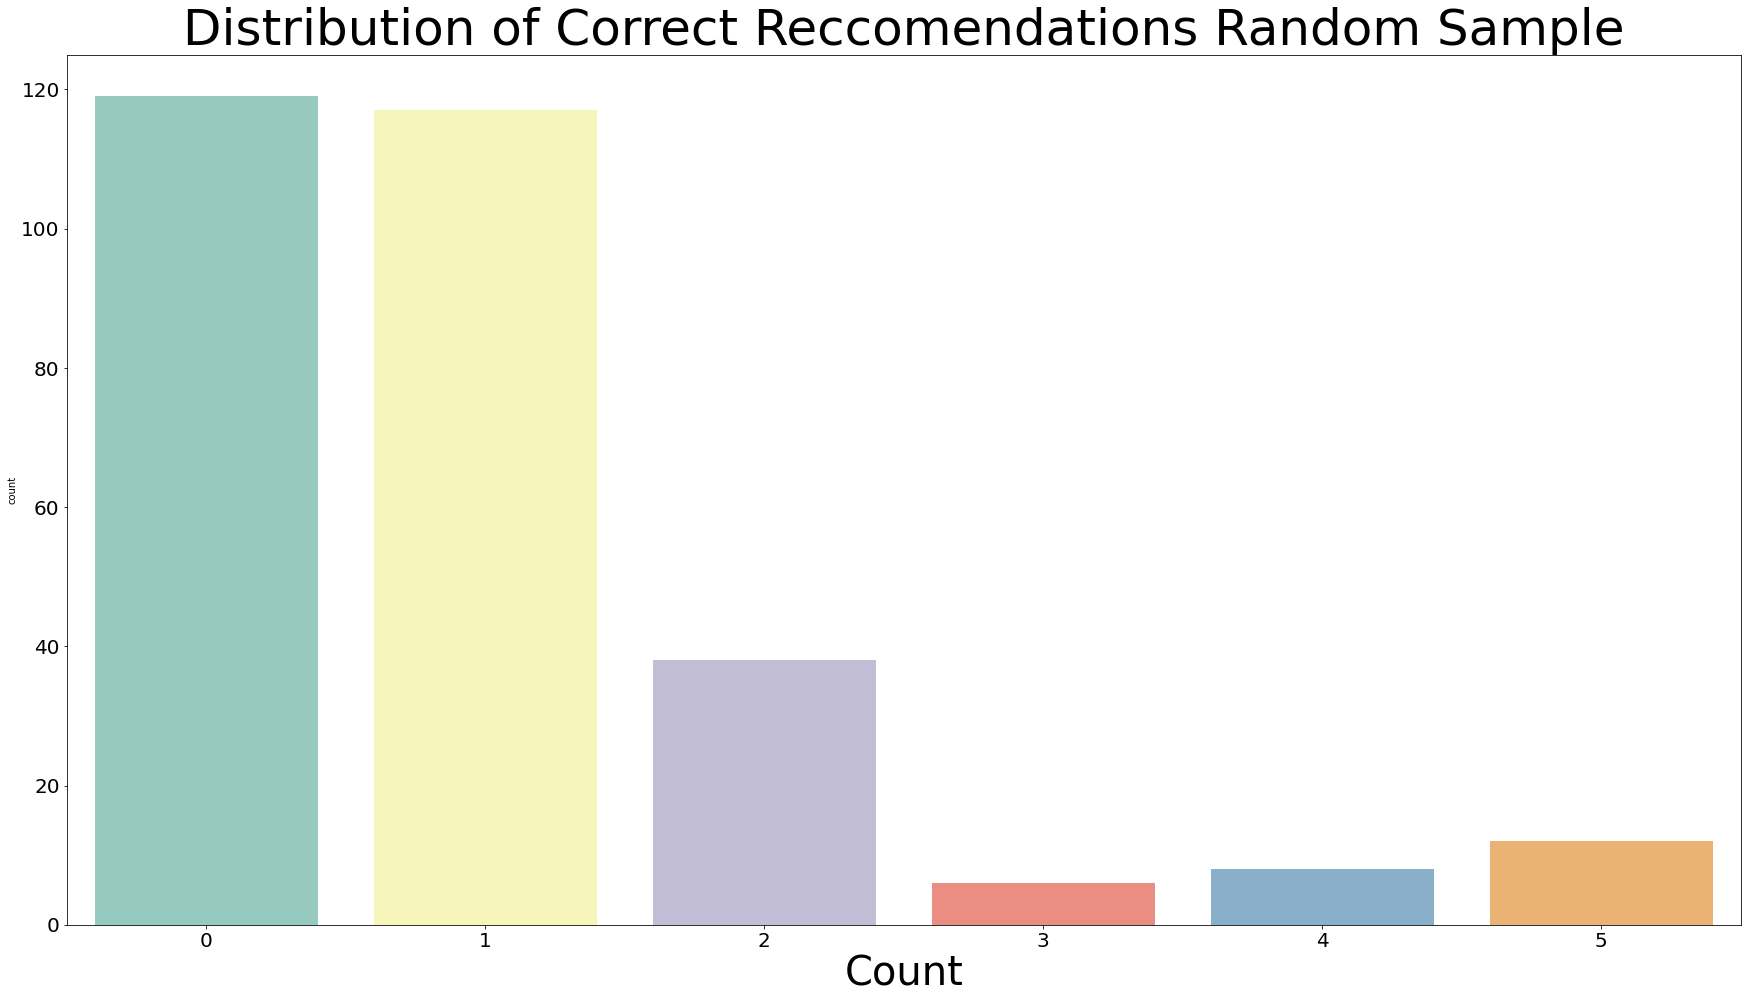

In [28]:

plt.figure(figsize=(30,16))

catcnt = sns.countplot(x="Accuracy", data=accuracies,palette="Set3")
catcnt.axes.set_title("Latent Factor Model Accuracy",fontsize=50)
catcnt.set_xlabel("Count",fontsize=40)
catcnt.tick_params(labelsize=30)

In [29]:
r1 = pd.read_csv('s3://kevinr/ratings2.csv')
r1

PRODUCT_ID                                       PRODUCT_DECS  \
0                1         MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK   
1                2                ACTIVE LAPTOP BACKPACK 15.6IN BLACK   
2                3  PIN POINT PRESENTATION POINTER W/INTEGRATED LA...   
3                4               ULTRASKIN PROLAPTOP SLEEVE13.3 BLACK   
4                5                          MULTI BASE 14.1IN BLACK .   
...            ...                                                ...   
609518       14444   EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD   
609519       14444   EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD   
609520       14444   EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD   
609521       14444   EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD   
609522       14444   EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD   

               PRODUCT_CAT     PRODUCT_SUBCAT  \
0              ACCESSORIES      CARRYING CASE   
1              ACCESSORIES      CARRYING CASE   
2            INPUT DEVICES  INPUT DEVICE ACCS   
3              ACCESSORIES      CARRYING CASE   
4              ACCESSORIES      CARRYING CASE   
...                    ...                ...   
609518  HARD DRIVE/OPTICAL      MOBILE DRIVES   
609519  HARD DRIVE/OPTICAL      MOBILE DRIVES   
609520  HARD DRIVE/OPTICAL      MOBILE DRIVES   
609521  HARD DRIVE/OPTICAL      MOBILE DRIVES   
609522  HARD DRIVE/OPTICAL      MOBILE DRIVES   

                               VENDOR_ID VENDOR_NAME VENDOR_CAT VENDOR_SUBCAT  \
0       9D6D09A057BD9EE705148D760EB8FE6C      DICOTA     DICOTA        DICOTA   
1       9D6D09A057BD9EE705148D760EB8FE6C      DICOTA     DICOTA        DICOTA   
2       9D6D09A057BD9EE705148D760EB8FE6C      DICOTA     DICOTA        DICOTA   
3       9D6D09A057BD9EE705148D760EB8FE6C      DICOTA     DICOTA        DICOTA   
4       9D6D09A057BD9EE705148D760EB8FE6C      DICOTA     DICOTA        DICOTA   
...                                  ...         ...        ...           ...   
609518  44A6286E5DB6E56C9B0F603E894B7746     SEAGATE    SEAGATE       SEAGATE   
609519  44A6286E5DB6E56C9B0F603E894B7746     SEAGATE    SEAGATE       SEAGATE   
609520  44A6286E5DB6E56C9B0F603E894B7746     SEAGATE    SEAGATE       SEAGATE   
609521  44A6286E5DB6E56C9B0F603E894B7746     SEAGATE    SEAGATE       SEAGATE   
609522  44A6286E5DB6E56C9B0F603E894B7746     SEAGATE    SEAGATE       SEAGATE   

       INVOICE_DATE                        INVOICE_ID  ...  UNITE_PRICE_$  \
0        06/23/2020  CA38801D2E2AB13E2580F659B70239BE  ...      59.623758   
1        05/06/2020  1DA8F10C4114AF81CB4B10CF913062E8  ...     136.573466   
2        02/12/2020  CC976D8D14BD9332878DB22C7E6448B9  ...      20.771532   
3        01/20/2020  5733423536EDE730E19F66D78BA86FEA  ...      22.304569   
4        01/30/2020  78D8FC9B592021B64E087D531A633855  ...      13.381863   
...             ...                               ...  ...            ...   
609518   01/14/2019  95CACE28E7AD8C4DE4335717360D01F4  ...      46.247593   
609519   01/31/2019  D2E743E2DF8C4A9CB1555534B4B3E08D  ...      46.371517   
609520   01/30/2019  8AEDD443B0528C8A5BE5EE2AFCA6D227  ...    1853.544022   
609521   02/04/2019  87B8EE0EA9ACBCE28A5D3EE43B559B67  ...      46.074939   
609522   02/04/2019  0033044F483FBFB59FCB9EEF866A0E87  ...     248.702922   

        QUANTITY_ORDERED  END_USER_ID   TOTAL_SPENT            STATE  \
0                      1            1  3.621332e+07           LONDON   
1                      3            1  3.621332e+07           LONDON   
2                      1            1  3.621332e+07           LONDON   
3                      1            1  3.621332e+07           LONDON   
4                      1            1  3.621332e+07           LONDON   
...                  ...          ...           ...              ...   
609518                 1       148459  4.624759e+01  BUCKINGHAMSHIRE   
609519                 1       148460  4.637152e+01             KENT

In [30]:
# get top 300 biggest spending customers

bs = r1.groupby('END_USER_ID')['TOTAL_SPENT'].unique()
big = pd.DataFrame({'User':bs.index, 'Spent':bs.values})
big = big.sort_values(['Spent'], ascending=False).head(300)

input1 = big.User.tolist()
input1

[15,
 1,
 11,
 24,
 15330,
 15416,
 18,
 283,
 120,
 3,
 10748,
 355,
 108,
 2,
 284,
 156,
 335,
 7049,
 797,
 652,
 2455,
 64331,
 9154,
 32326,
 31560,
 29382,
 39819,
 107878,
 58788,
 33690,
 102,
 43137,
 119,
 121,
 356,
 3710,
 1621,
 11826,
 2150,
 98105,
 808,
 5140,
 24422,
 123,
 1367,
 13218,
 6854,
 2061,
 1012,
 1499,
 17244,
 197,
 29025,
 750,
 1978,
 6946,
 58013,
 12,
 661,
 10554,
 8197,
 199,
 26883,
 2658,
 19,
 996,
 2249,
 39948,
 40714,
 30776,
 21572,
 151,
 1366,
 3015,
 40075,
 2897,
 126,
 150,
 20745,
 13004,
 1620,
 1022,
 107,
 3619,
 438,
 97,
 312,
 67963,
 2716,
 11410,
 3709,
 152,
 1308,
 4746,
 64727,
 437,
 11946,
 39895,
 6895,
 10436,
 363,
 20,
 39866,
 321,
 269,
 67970,
 7016,
 13726,
 119132,
 6536,
 31708,
 10561,
 10890,
 657,
 70867,
 59060,
 39864,
 8272,
 502,
 6833,
 40124,
 10572,
 1541,
 25239,
 40010,
 19568,
 5552,
 2898,
 795,
 5515,
 18184,
 39831,
 1537,
 3713,
 8266,
 3916,
 3923,
 5579,
 10456,
 40168,
 28933,
 504,
 798,
 135

In [31]:
## evaluate accuracy of model on sample


accuracies = pd.DataFrame({'UserID':input1})


accuracies

UserID
0        15
1         1
2        11
3        24
4     15330
..      ...
295   23084
296   69226
297   10530
298     154
299   69949

[300 rows x 1 columns]

In [32]:
accuracies['Accuracy'] = accuracies['UserID'].apply(lambda x: getAccuracy(x))
accuracies

t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t


UserID  Accuracy
0        15         5
1         1         5
2        11         5
3        24         5
4     15330         5
..      ...       ...
295   23084         5
296   69226         5
297   10530         5
298     154         5
299   69949         0

[300 rows x 2 columns]

In [33]:
#avg correct rec
accuracies.Accuracy.mean()

3.97

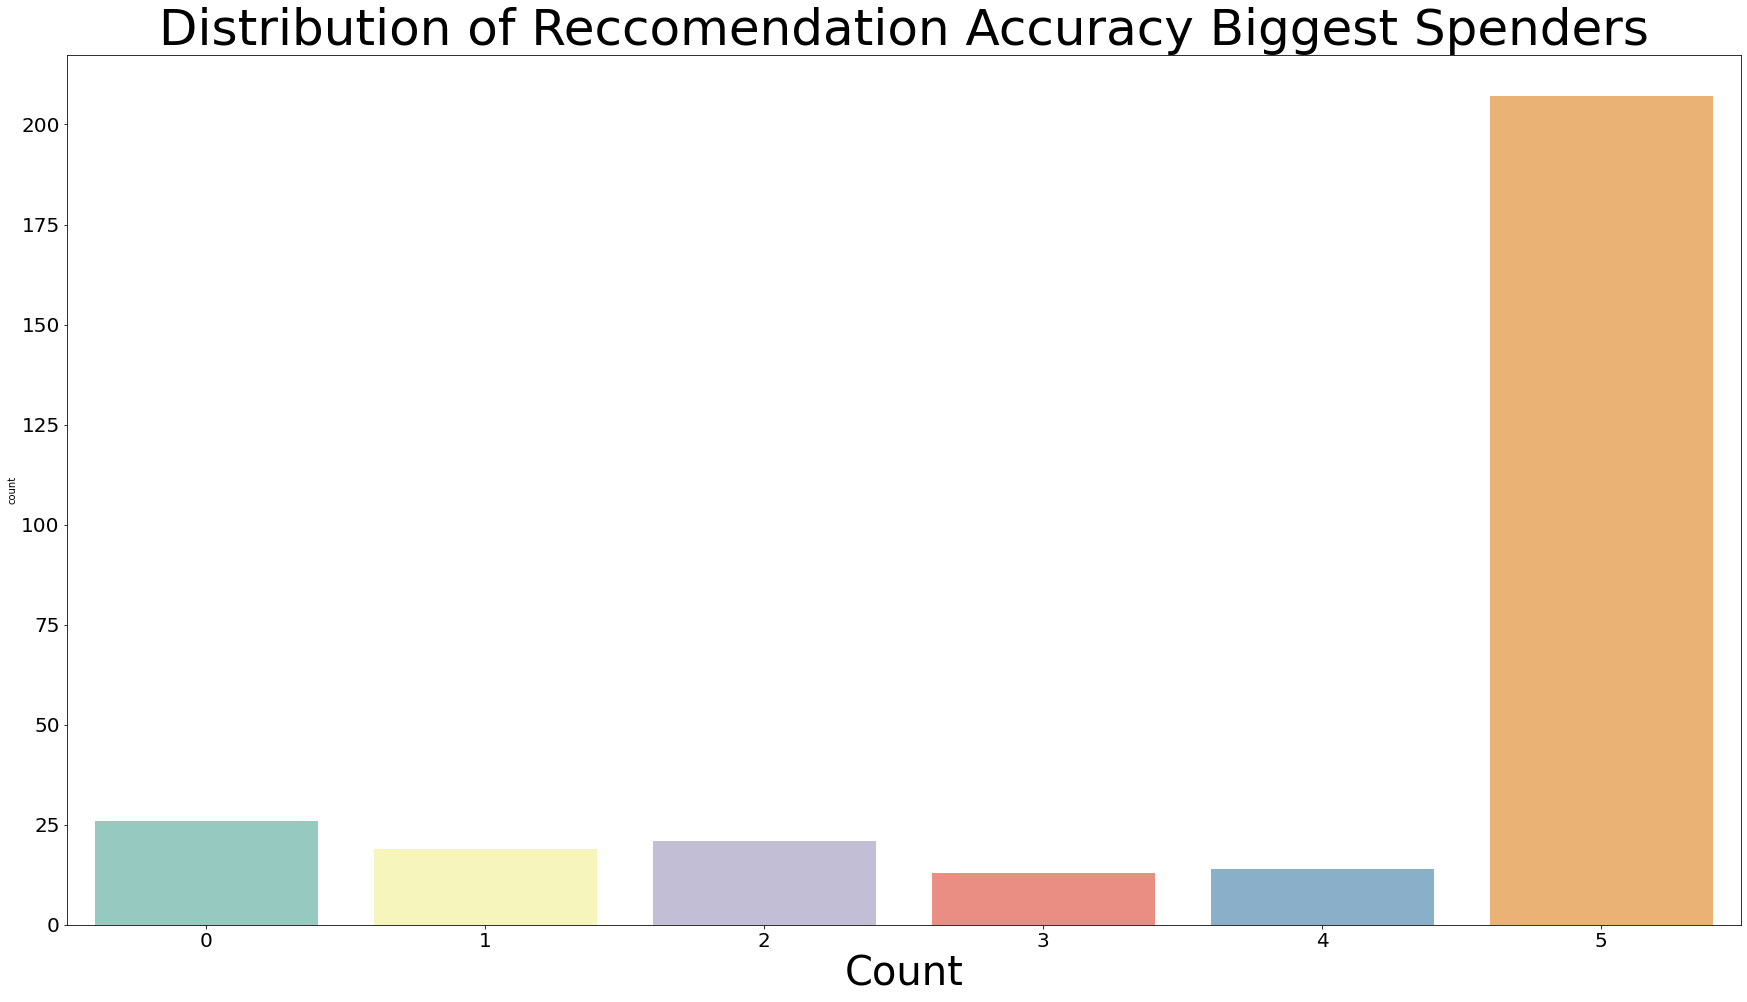

In [34]:

plt.figure(figsize=(30,16))

catcnt = sns.countplot(x="Accuracy", data=accuracies,palette="Set3")
catcnt.axes.set_title("Latent Factor Model Accuracy - Biggest Spenders",fontsize=50)
catcnt.set_xlabel("Count",fontsize=40)
catcnt.tick_params(labelsize=30)

In [ ]:
# k = 50 acc = .83 k = 100 acc = 1.09 k = 300 acc = 1.66 k = 400 acc = 1.89 k = 500 2.05

In [ ]:
## get accuracy on highest earning customers
